In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

2024-04-18 18:28:18.458023: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 18:28:18.585674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 18:28:18.585766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 18:28:18.601643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 18:28:18.653840: I tensorflow/core/platform/cpu_feature_guar

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
gpu

2024-04-18 17:48:58.615386: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:58.819084: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:58.819163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data() # MNIST 에 있는 훈련 세트와 테스트 세트를 가져와 저장


train_images = train_images.reshape((60000, 28 * 28))
# 60000, 784
train_images = train_images.astype("float32") / 255

train_images, val_images = train_images[:50000], train_images[50000:]
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [4]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2024-04-18 17:48:59.207765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:59.207902: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:59.207939: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:59.661977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 17:48:59.662043: I external/local_xla/xla/stream_executor

In [5]:
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(val_images, val_labels))
# 모델을 train_images와 train_labels를 이용하여 훈련시킴.

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0743 - val_accuracy: 0.9808
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0730 - val_accuracy: 0.9816
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0793 - val_accuracy: 0.9807
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0751 - val_accuracy: 0.9826


In [9]:
history.history

{'loss': [0.007382954005151987,
  0.005209994036704302,
  0.0035154959186911583,
  0.0028111410792917013,
  0.001619325252249837],
 'accuracy': [0.9984999895095825,
  0.9988999962806702,
  0.9994400143623352,
  0.9995999932289124,
  0.9998599886894226],
 'val_loss': [0.07429994642734528,
  0.07867036014795303,
  0.0729958638548851,
  0.07927051931619644,
  0.07505975663661957],
 'val_accuracy': [0.9807999730110168,
  0.9789999723434448,
  0.9815999865531921,
  0.9807000160217285,
  0.9825999736785889]}

In [10]:
data = {
    'loss': [0.01879442296922207, 0.014016644097864628, 0.011360413394868374, 0.008034272119402885, 0.005908384919166565],
    'accuracy': [0.9947400093078613, 0.9961000084877014, 0.9968000054359436, 0.9976599812507629, 0.9986000061035156],
    'val_loss': [0.020174838602542877, 0.021637488156557083, 0.0246022567152977, 0.02715890109539032, 0.033388469368219376],
    'val_accuracy': [0.9948999881744385, 0.9936000108718872, 0.9927999973297119, 0.993399977684021, 0.9915000200271606]
}

# 변환된 데이터를 담을 리스트
transformed_data = []

# 딕셔너리의 키를 반복하여 데이터를 변환
for key, values in data.items():
    if 'accuracy' in key:
        metric_type = 'accuracy'
    elif 'loss' in key:
        metric_type = 'loss'
     
    if 'val_' in key:
        data_type = 'validation'
    else:
        data_type = 'train'
    
    for epoch, value in enumerate(values, start=1):
        transformed_data.append({
            'type': f"{data_type}_{metric_type}",
            'epoch': epoch,
            'value': value
        })

# 결과 출력
transformed_data

[{'type': 'train_loss', 'epoch': 1, 'value': 0.01879442296922207},
 {'type': 'train_loss', 'epoch': 2, 'value': 0.014016644097864628},
 {'type': 'train_loss', 'epoch': 3, 'value': 0.011360413394868374},
 {'type': 'train_loss', 'epoch': 4, 'value': 0.008034272119402885},
 {'type': 'train_loss', 'epoch': 5, 'value': 0.005908384919166565},
 {'type': 'train_accuracy', 'epoch': 1, 'value': 0.9947400093078613},
 {'type': 'train_accuracy', 'epoch': 2, 'value': 0.9961000084877014},
 {'type': 'train_accuracy', 'epoch': 3, 'value': 0.9968000054359436},
 {'type': 'train_accuracy', 'epoch': 4, 'value': 0.9976599812507629},
 {'type': 'train_accuracy', 'epoch': 5, 'value': 0.9986000061035156},
 {'type': 'validation_loss', 'epoch': 1, 'value': 0.020174838602542877},
 {'type': 'validation_loss', 'epoch': 2, 'value': 0.021637488156557083},
 {'type': 'validation_loss', 'epoch': 3, 'value': 0.0246022567152977},
 {'type': 'validation_loss', 'epoch': 4, 'value': 0.02715890109539032},
 {'type': 'validation_

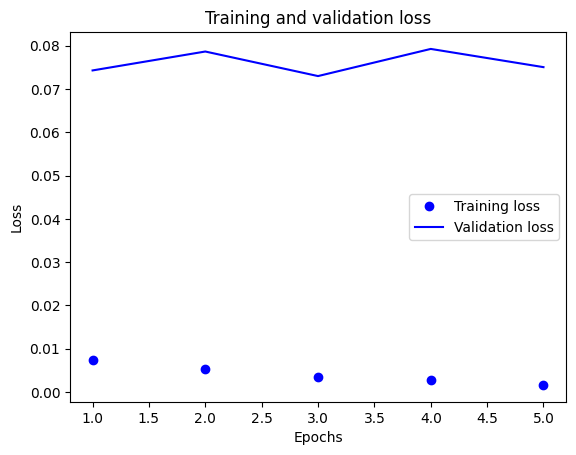

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss